## Import required libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from prettytable import PrettyTable
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Read, process and split data

In [2]:
url = 'tested.csv'
data = pd.read_csv(url)

In [3]:
data.isnull().sum()  #How many null in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
# drop embarked
data.drop('Cabin', axis=1, inplace=True)

In [5]:
# drop na
data.dropna(inplace=True)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [7]:

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [8]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

In [9]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

In [10]:
# Standardize

scalar = StandardScaler().fit(x_train)
x_train_transformed = scalar.transform(x_train)
x_test_transformed = scalar.transform(x_test)

## Create and predict model

In [24]:
# Cross validation for hyper-parameter tuning
hyperparameter_score_list = []
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for c in np.arange(0.5,3,0.5):
        svm = SVC(kernel=kernel, C=c)
        scores = cross_validate(svm, x_train_transformed, y_train, cv=15, scoring='accuracy')
        mean_score = np.mean(scores['test_score'])
        hyperparameter_score_list.append([kernel, c, mean_score])
# Choose the hyper-parameters (with highest average accuracy)
myTable = PrettyTable(["Kernel", "C", "Avg accuracy"])
for row in hyperparameter_score_list:
    myTable.add_row([row[0], row[1], round(row[2],3)])
print(myTable)

+---------+-----+--------------+
|  Kernel |  C  | Avg accuracy |
+---------+-----+--------------+
|  linear | 0.5 |     1.0      |
|  linear | 1.0 |     1.0      |
|  linear | 1.5 |     1.0      |
|  linear | 2.0 |     1.0      |
|  linear | 2.5 |     1.0      |
|   poly  | 0.5 |     1.0      |
|   poly  | 1.0 |     1.0      |
|   poly  | 1.5 |     1.0      |
|   poly  | 2.0 |     1.0      |
|   poly  | 2.5 |     1.0      |
|   rbf   | 0.5 |    0.989     |
|   rbf   | 1.0 |    0.989     |
|   rbf   | 1.5 |    0.996     |
|   rbf   | 2.0 |    0.996     |
|   rbf   | 2.5 |    0.996     |
| sigmoid | 0.5 |    0.966     |
| sigmoid | 1.0 |    0.969     |
| sigmoid | 1.5 |    0.981     |
| sigmoid | 2.0 |    0.977     |
| sigmoid | 2.5 |    0.966     |
+---------+-----+--------------+


## Analysis(Accuracy score) and Visualisation(matplotlib or Seaborn)

In [25]:
import matplotlib.pyplot as plt

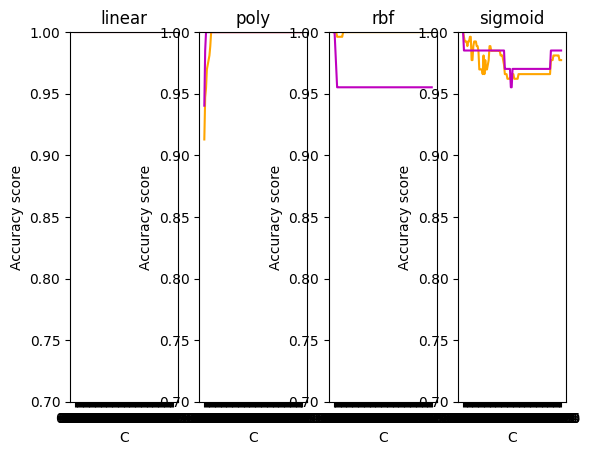

In [43]:
# Try different C
c_range = np.linspace(0.1, 3, 116)

test_svm = []
train_svm = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    test_svm1 = []
    train_svm1 = []
    for c in c_range:
        svm_classifier = SVC(kernel=kernel, C=c)
        svm_classifier.fit(x_train_transformed, y_train)
        train_svm1.append(svm_classifier.score(x_train_transformed, y_train))
        test_svm1.append(svm_classifier.score(x_test_transformed, y_test))
    test_svm.append(test_svm1)
    train_svm.append(train_svm1)
# Line plot of training/testing score
fig, axes = plt.subplots(nrows = 1,ncols = 4)
for i in range(0,4):
    arr = train_svm[i]
    arr1 = test_svm[i]
    axes[i].plot(c_range, arr, c='orange', label='Train')
    axes[i].plot(c_range, arr1, c='m', label='test')
    axes[i].set_xlabel('C')
    axes[i].set_xticks(c_range)
    axes[i].set_ylabel('Accuracy score')
    axes[i].set_ylim(0.7, 1)
    axes[i].set_title(kernels[i])
    

